In [1]:
import ROOT

# let's create a function describing the distribution of amplitudes we expect to get from electronic noise
sigmaNoise = 5 # we'll work in mV, so this means the standard deviation for the noise is 5 mV
fNoise = ROOT.TF1("ElecNoiseBg", "TMath::Gaus(x, 0, %f)" % sigmaNoise, -100, 500) # define it in [-100, 500] mV
fNoise.SetNpx(10000) # this makes sure the function is drawn with many points, to remove jaggedness (default is 100)

fNoise.Print()

Welcome to JupyROOT 6.22/02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: PulseAmplitudes


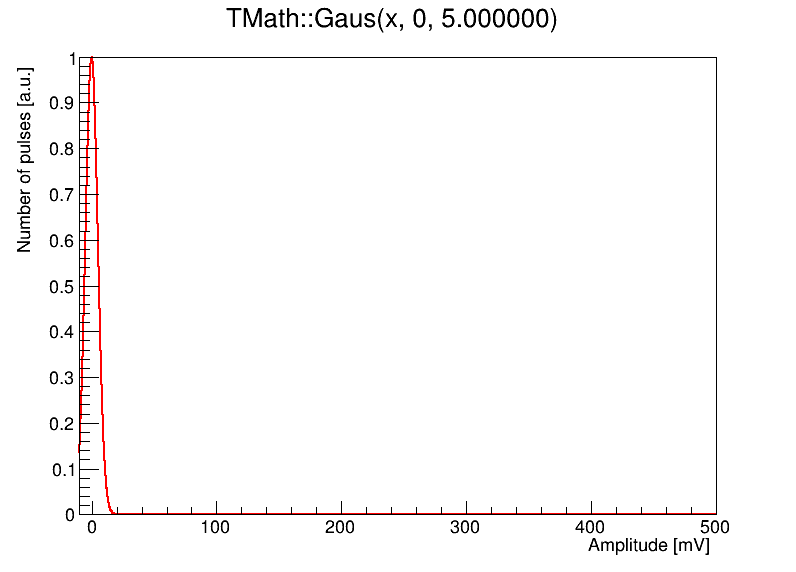

In [10]:
# we need to create a canvas to draw our functions on
canvas = ROOT.TCanvas("PulseAmplitudes", "Pulse amplitudes", 800, 600)

fNoise.Draw()
fNoise.GetHistogram().GetXaxis().SetTitle("Amplitude [mV]")
fNoise.GetHistogram().GetYaxis().SetTitle("Number of pulses [a.u.]")
canvas.Draw()

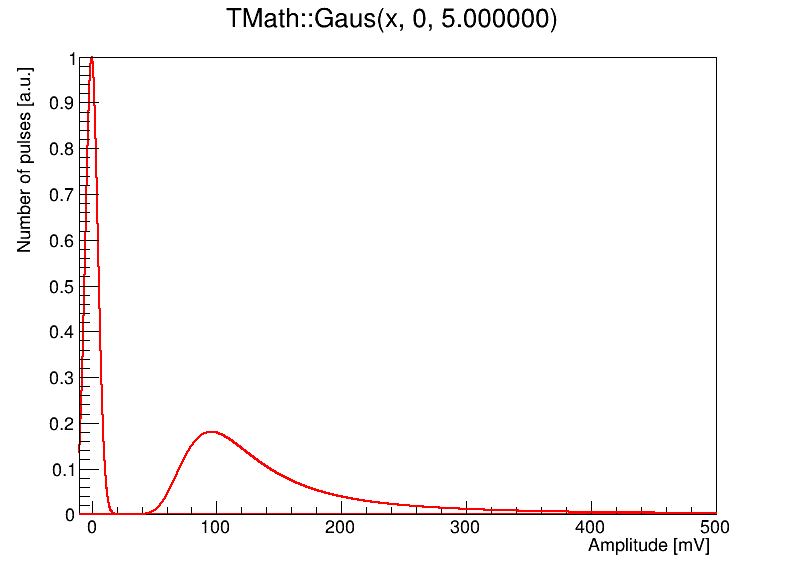

In [11]:
# let's now make a function that describes the distribution of amplitudes we expect for our signal pulses, 
# i.e. those that come from actual charged particles passing through the silicon sensors of HGTD

fSignal = ROOT.TF1("Signal", "TMath::Landau(x, 100, 20)", -100, 500) # MPV = 100 mV, sigma = 50 mV
fSignal.SetNpx(10000)

fSignal.Draw("SAME") # the option draws this function on top of anything that was already on the canvas
canvas.Draw()

In [12]:
# let's make it easier to draw these with different colors etc through a dict
# this dict will be used to set the style of the various functions and histograms we'll make
plots = {
    "bg" : {
        "hist" : fNoise,
        "color" : ROOT.kRed,
        "drawrangex" : [-10, 500],
        "drawrangey" : [1e-10, 1]
    },
    "signal" : {
        "hist" : fSignal,
        "color" : ROOT.kBlack,
        "drawrangex" : [-10, 500],
        "drawrangey" : [1e-10, 1]
    }
}

# function to draw all functions
def drawFunctions():
    counter = 0
    for p in plots:
        print("Will now draw %s" % p)
        plots[p]["hist"].SetLineColor(plots[p]["color"])
        plots[p]["hist"].GetXaxis().SetRangeUser(plots[p]["drawrangex"][0], plots[p]["drawrangex"][1])
        plots[p]["hist"].GetYaxis().SetRangeUser(plots[p]["drawrangey"][0], plots[p]["drawrangey"][1])
        drawOptions = ""
        if counter > 0:
            drawOptions += "SAME"
        plots[p]["hist"].Draw(drawOptions)
        counter += 1

Will now draw bg
Will now draw signal


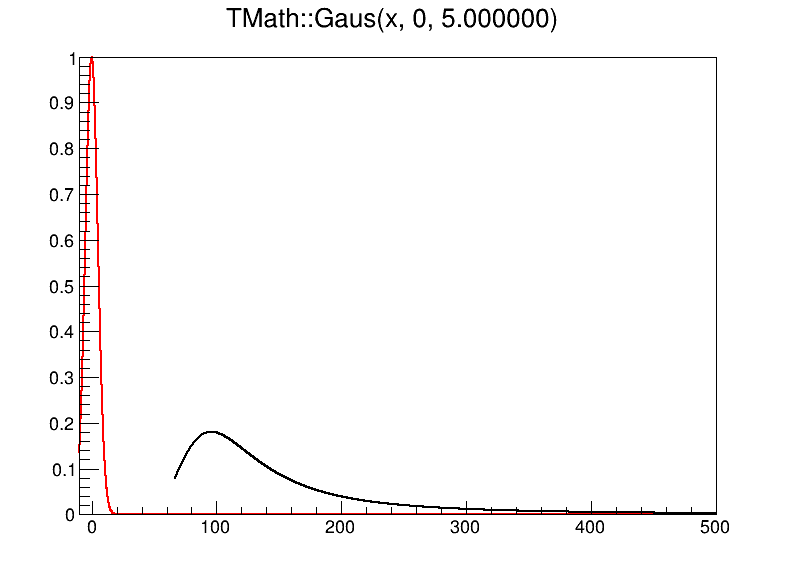

In [5]:
# draw the functions with the newly defined options
drawFunctions()
canvas.Draw()

Will now draw bg
Will now draw signal


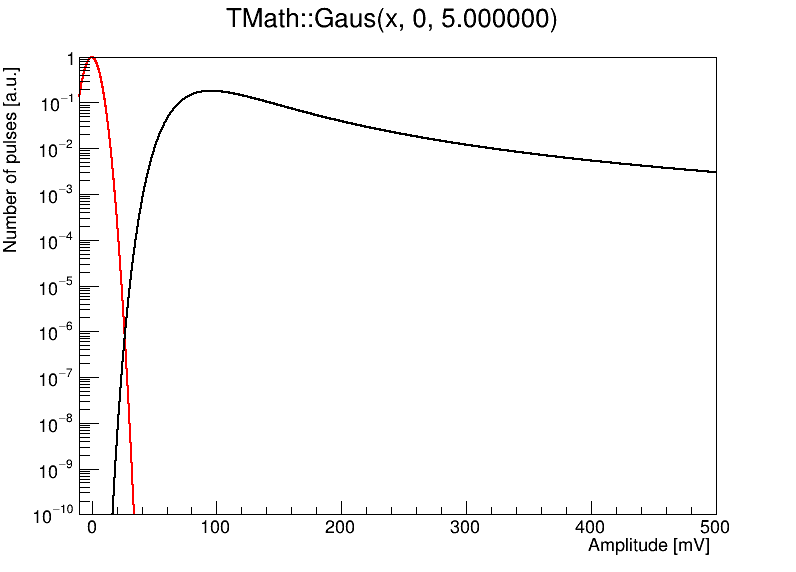

In [13]:
# use logarithmic y-axis to better see the low values
canvas.SetLogy(1)
drawFunctions()
canvas.Draw()

In [31]:
# let's see what fraction of the pulses we'll get if we put a threshold at 50 mV
threshold = 30
selectedSignal = fSignal.Integral(threshold, 500)
allSignal = fSignal.Integral(0, 500)
print("Fraction of signal pulses below threshold: %E" % ((allSignal-selectedSignal)/allSignal))

selectedNoise = fNoise.Integral(threshold, 500)
allNoise = fNoise.Integral(-100, 500)
print("Fraction of background pulses above threshold: %E" % (selectedNoise/allNoise))

Fraction of signal pulses below threshold: 5.992071E-07
Fraction of background pulses above threshold: 9.865876E-10
